# Chapter 6.1 - Pandas introduction

Pandas is a package that can read in, analyze, process, and modify tabular data (e.g., csv files)

<a href=https://pandas.pydata.org/docs/getting_started/index.html>Pandas examples</a>

### Reading in csv files:

Much like numpy and matplotlib, we just need to import pandas to access its methods. The typical practice is to import it as the alias ```pd```:

In [1]:
import pandas as pd

### Download csv file

In [2]:
import os
import requests

if not os.path.exists("btr_month_tmean.csv"):

    response = requests.get("https://arcus.niu.edu/btr_month_tmean.csv", stream=True)

    with open("btr_month_tmean.csv", 'wb') as f:
        for chunk in response.iter_content(chunk_size=8192):
            f.write(chunk)
    print(f"File '{"btr_month_tmean.csv"}' downloaded successfully.")

else:
    print("already downloaded csv!")

already downloaded csv!


### Chapter 6.2.1 - Reading a file

The most basic method provided by pandas is the ```read_csv``` method which takes a filename as an argument. 

In the file explorer tab, you will see a file named ```btr_month_tmean.csv``` after you run the download code above. We will use this file for the examples in this notebook.

First, to read in the file, you use the following code. The filename is either a relative path (the file is in this folder or a subfolder) or an absolute path (fake example: C:/Users/Test/Example/Etc./etc./file).

In [3]:
import pandas as pd


df = pd.read_csv("btr_month_tmean.csv")

df # just typing df will print out the data

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,1930,50.84,60.14,58.53,70.93,NaN,81.12,82.24,81.89,78.52,67.93,59.67,49.60
1,1931,50.68,57.33,55.57,64.83,71.62,80.13,82.69,79.55,80.79,73.16,66.38,60.69
2,1932,58.38,63.70,56.55,68.20,73.26,81.55,83.47,82.40,77.66,NaN,54.32,54.33
3,1933,58.23,56.04,62.00,67.45,79.35,NaN,81.15,81.47,81.30,70.72,60.32,62.21
4,1934,54.71,54.13,59.26,67.59,73.37,80.97,81.27,81.52,75.69,71.68,61.90,53.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,2016,50.82,56.00,65.68,69.42,74.55,82.05,84.37,83.29,81.67,73.10,63.63,57.52
87,2017,59.31,64.48,66.48,71.05,72.74,79.17,82.98,81.65,78.18,70.58,62.27,52.50
88,2018,46.29,65.16,63.21,63.97,79.00,82.73,83.90,82.60,81.33,72.90,56.75,54.18
89,2019,51.28,62.66,60.76,67.48,77.82,81.65,82.73,84.26,82.95,71.21,57.05,56.55


### Chapter 6.1.2 - pandas DataFrame

There are multiple ways to access specific data in a DataFrame. In the case of these data, you may want to access an entire year of data. This can be done by providing the ```index``` to a pandas method called ```loc``. What is an index?

We can print the index using the following code:

In [4]:
df.index.values

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90])

As you can see, the indexes are just a list of numbers between 0 and 90. By default, pandas will automatically assign these ordered indexes when a csv file is read in. Each index will be unique, and the maximum value corresponds to the number of rows minus 1 (since we start at 0).

If we want to access the row at index 0, we can just use the ```loc`` method (short for 'location'):

In [5]:
df.loc[0]

YEAR    1930.00
JAN       50.84
FEB       60.14
MAR       58.53
APR       70.93
MAY         NaN
JUN       81.12
JUL       82.24
AUG       81.89
SEP       78.52
OCT       67.93
NOV       59.67
DEC       49.60
Name: 0, dtype: float64

As you can see, this prints out all of the monthly data from the first row only (which happens to correspond with all monthly values in 1930, since 1930 was the first row in the csv file)

This approach is somewhat useful, but it is more useful to explicitly set our indexes in a way that makes sense in for our domain, problem, etc.

In this case, the ```YEAR``` column makes more sense to use as an index. We can tell pandas to use it as the index by adding an argument to the ```read_csv``` method called ```index_col```. This argument takes a string that corresponds to the name of the column you want to use as the index:

In [6]:
import pandas as pd

df = pd.read_csv("btr_month_tmean.csv", index_col='YEAR')

df.loc[1930]

JAN    50.84
FEB    60.14
MAR    58.53
APR    70.93
MAY      NaN
JUN    81.12
JUL    82.24
AUG    81.89
SEP    78.52
OCT    67.93
NOV    59.67
DEC    49.60
Name: 1930, dtype: float64

Now, we can access the data in a more understandable way (much like we did with dictionaries). In the case above, we simply used 1930 as our desired key, and the DataFrame (which we specified should use ```YEAR``` as its index) returns the row associated with that key.

### Chapter 6.1.3 - Practice with DataFrames

Answer the following questions using the following pandas DataFrame and only the ```loc`` method.

In [7]:
import pandas as pd
import numpy as np

df = pd.read_csv("btr_month_tmean.csv", index_col='YEAR')


### What was the temperature in June of 1992?


### What was the temperature in January of 2001?


### Which August was warmer? 2015 or 2018?


### What was the temperature for the year and month you were born?



### Chapter 6.1.4 - Accessing column values

We access specific columns in a pandas ```DataFrame``` in a way that is very similar to dictionaries.

One you read in your csv file and the ```DataFrame``` is created, you can access a column using square brackets and the column name:

In [8]:
import pandas as pd

df = pd.read_csv("btr_month_tmean.csv", index_col='YEAR')

df['AUG']

YEAR
1930    81.89
1931    79.55
1932    82.40
1933    81.47
1934    81.52
        ...  
2016    83.29
2017    81.65
2018    82.60
2019    84.26
2020    83.71
Name: AUG, Length: 91, dtype: float64

**This result is the temperature for every August from 1930 to 2020.**

Just for fun, lets try to plot this!

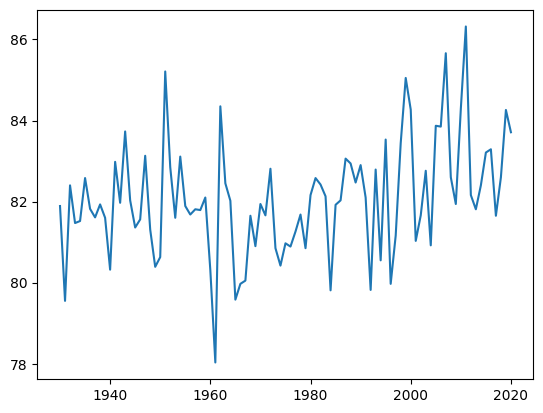

In [9]:
import matplotlib.pyplot as plt

plt.plot(df['AUG'])

plt.show()

### Chapter 6.1.5 - pandas plotting

Pandas ```DataFrame``` objects work very well with matplotlib without having to think too much about it! The column that you accessed had index information in the form of a ```YEAR``` which was automatically interpreted by matplotlib to be the x-axis value. You can be more explicit about it by using the ```values``` method, which converts pandas information into a numpy array.

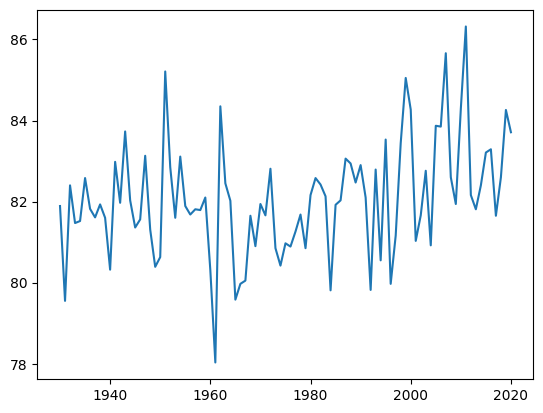

X values= [1930 1931 1932 1933 1934 1935 1936 1937 1938 1939 1940 1941 1942 1943
 1944 1945 1946 1947 1948 1949 1950 1951 1952 1953 1954 1955 1956 1957
 1958 1959 1960 1961 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971
 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985
 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999
 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015 2016 2017 2018 2019 2020]
Y values= [81.89 79.55 82.4  81.47 81.52 82.58 81.82 81.61 81.93 81.6  80.32 82.98
 81.97 83.73 82.03 81.36 81.56 83.13 81.31 80.39 80.63 85.21 82.85 81.6
 83.11 81.89 81.68 81.81 81.79 82.1  80.31 78.03 84.35 82.45 82.02 79.58
 79.97 80.05 81.65 80.9  81.94 81.66 82.81 80.85 80.42 80.97 80.89 81.26
 81.68 80.85 82.16 82.58 82.42 82.13 79.81 81.92 82.03 83.06 82.94 82.47
 82.9  82.1  79.82 82.79 80.55 83.53 79.97 81.16 83.44 85.05 84.27 81.03
 81.66 82.76 80.92 83.87 83.85 85.66 82.6  81.94 84.29 86.32 82.16 81.81
 82.4  

In [10]:
import matplotlib.pyplot as plt

x = df.index.values

y = df['AUG'].values

plt.plot(x, y)

plt.show()

print("X values=", x)
print("Y values=", y)

### Chapter 6.1.6 - Indexing practice

Combining the index with the column names to access specific values

Get into groups and answer the following questions more specifically than before:

In [11]:
import pandas as pd
import numpy as np

df = pd.read_csv("btr_month_tmean.csv", index_col='YEAR')

### What was the temperature in June of 1992?
month = 'June'
year = 1992

result = np.nan 

print(f"The temperature in {month} of {year} was {result:.2f}")

### What was the temperature in January of 2001?
month = 'January'
year = 2001

result = np.nan 

print(f"The temperature in {month} of {year} was {result:.2f}")

### Which August was warmer? 2015 or 2018?
month = 'August'
year1 = 2015
year2 = 2018

result1 = np.nan
result2 = np.nan

print(f"The temperature in {month} of {year1} was {result1:.2f}")

print(f"The temperature in {month} of {year2} was {result2:.2f}")

### What was the temperature for the year and month you were born?

birth_month = np.nan
birth_year = np.nan

result = np.nan

print(f"The temperature in {birth_month} of {birth_year} was {result:.2f}")

The temperature in June of 1992 was nan
The temperature in January of 2001 was nan
The temperature in August of 2015 was nan
The temperature in August of 2018 was nan
The temperature in nan of nan was nan


### Chapter 6.1.7 - Data summaries using pandas

We can use the ```describe``` method to examine summary statistics of data within a ```DataFrame```

In [12]:
import pandas as pd

df = pd.read_csv("btr_month_tmean.csv", index_col='YEAR')

df['AUG'].describe()

count    91.000000
mean     82.060989
std       1.415806
min      78.030000
25%      81.285000
50%      81.940000
75%      82.830000
max      86.320000
Name: AUG, dtype: float64

This is equivalent to using numpy, but much easier!

In [13]:
import pandas as pd

df = pd.read_csv("btr_month_tmean.csv", index_col='YEAR')

print("Numpy version")

print("count", len(df['AUG']))

print("mean", np.mean(df['AUG']))
print("std", np.std(df['AUG']))
print("min", np.min(df['AUG']))
print("25%", np.percentile(df['AUG'], 25))
print("50%", np.percentile(df['AUG'], 50))
print("75%", np.percentile(df['AUG'], 75))
print("max", np.max(df['AUG']))

Numpy version
count 91
mean 82.06098901098902
std 1.4080054125029076
min 78.03
25% 81.285
50% 81.94
75% 82.83
max 86.32


### Chatper 6.1.8 - Climatology with pandas

Get into groups and answer the following climatology questions. Provide code that proves your point.

How does the June temperature in 1992 compare to a typical June temperature?

In [14]:
# your code here

Was the January temperature in 2001 above the 75th percentile?

In [15]:
# your code here

How many standard deviations was August 2015 and August 2018 from the mean? Specify whether or not they were above or below the mean.

In [16]:
# your code here

How does the temperature during the month and year you were born compare to a typical temperature during that month?

In [17]:
# your code here

Create a scatterplot that examines the correlation between June and July temperatures

In [18]:
import matplotlib.pyplot as plt
import numpy as np

june = np.nan
july = np.nan

### use june as the x value and july as the y value for the scatterplot.
